In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [46]:
data = pd.read_csv('titanic_data.csv')

In [47]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Types of Features** :

- **Categorical**   - Sex, and Embarked.
- **Continuous**    - Age, Fare
- **Discrete**      - SibSp, Parch.
- **Alphanumeric**  - Cabin

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Numerical Value Analysis

<Axes: >

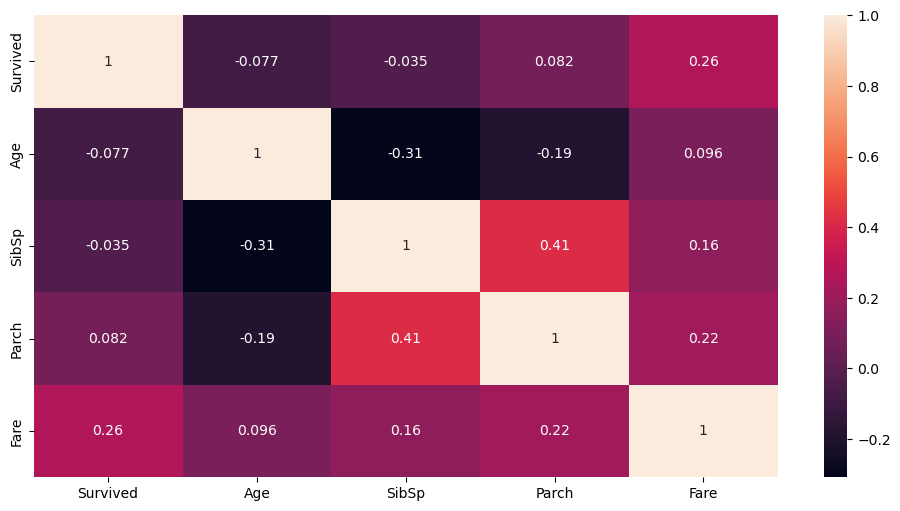

In [14]:
plt.figure(figsize = (12, 6))
sns.heatmap(data[['Survived', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), annot = True)

In [17]:
data['SibSp'].nunique()

7

In [18]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

<Axes: xlabel='SibSp', ylabel='Survived'>

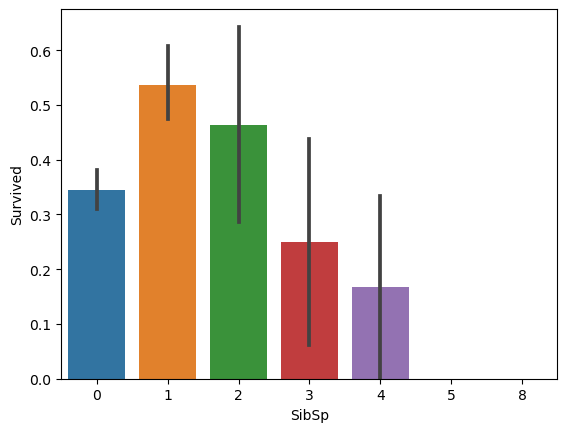

In [24]:
sns.barplot(x = 'SibSp', y = 'Survived', data = data)

C:\Users\ghara\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\ghara\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


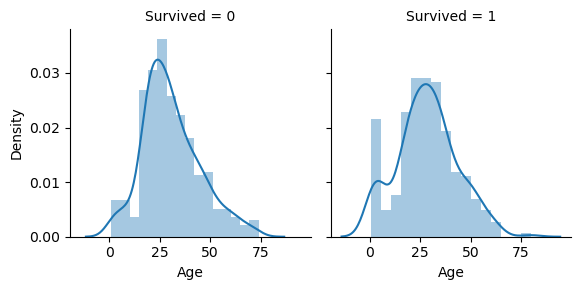

In [32]:
sns.FacetGrid(data, col = 'Survived').map(sns.distplot, 'Age')

<Axes: xlabel='Sex', ylabel='Survived'>

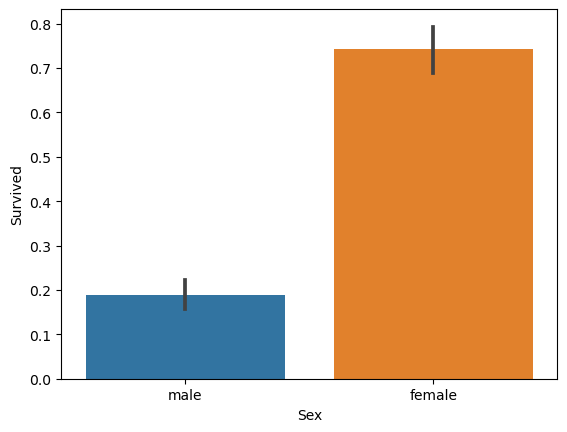

In [34]:
sns.barplot(x = 'Sex', y = 'Survived', data = data)

<Axes: xlabel='Pclass', ylabel='Survived'>

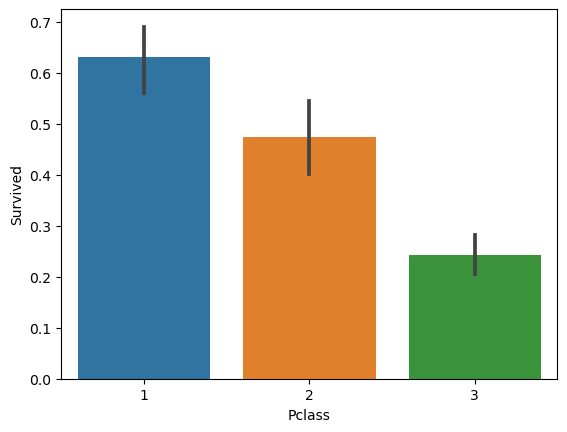

In [37]:
sns.barplot(x = 'Pclass', y = 'Survived', data = data)

In [39]:
data[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


<Axes: xlabel='Pclass', ylabel='Survived'>

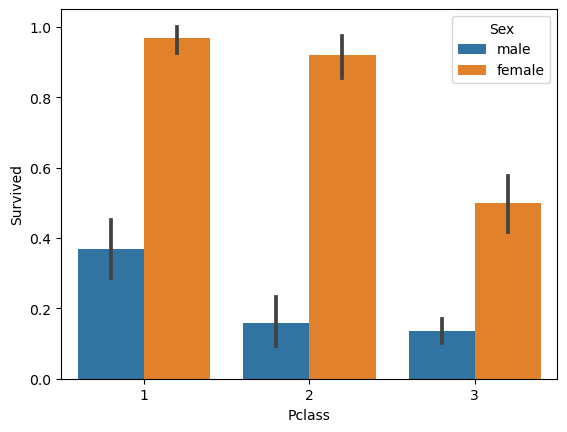

In [38]:
sns.barplot(x = 'Pclass', y = 'Survived', data = data, hue = 'Sex')

## Filling Embarked with most occuring port

In [48]:
data['Embarked'].isnull().sum()

2

In [49]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [50]:
data['Embarked'] = data['Embarked'].fillna("S")

In [51]:
data['Embarked'].isnull().sum()

0

<Axes: xlabel='Embarked', ylabel='Survived'>

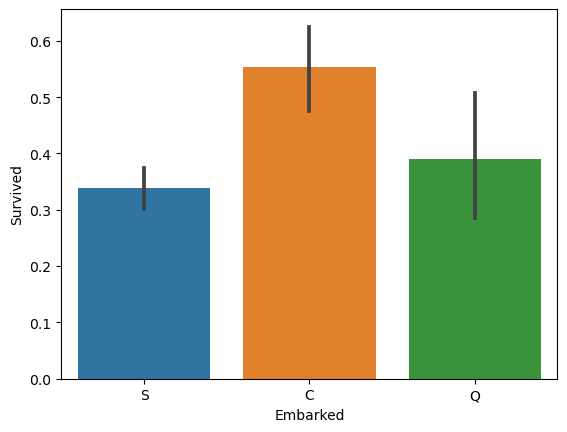

In [54]:
sns.barplot(x = 'Embarked', y = 'Survived', data = data)

It seems Cherbourg(C) have survived the most, lets find out why is it

<Axes: xlabel='Embarked', ylabel='count'>

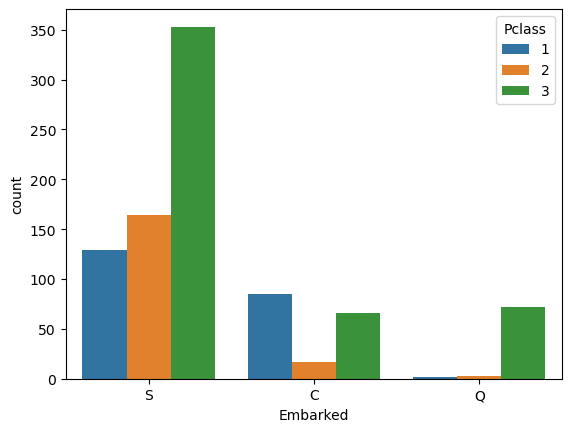

In [60]:
sns.countplot(x = 'Embarked', data = data, hue = 'Pclass')

<Axes: xlabel='Embarked', ylabel='count'>

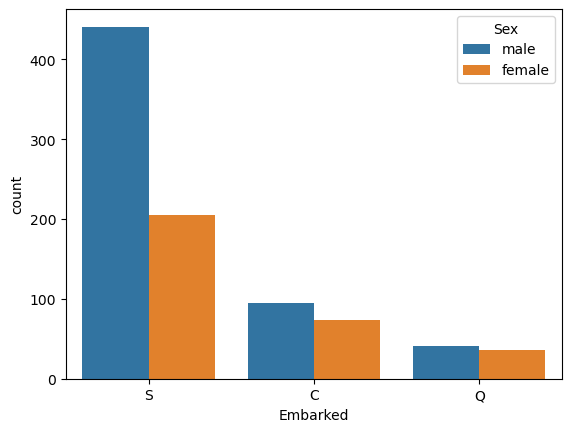

In [61]:
sns.countplot(x = 'Embarked', data = data, hue = 'Sex')

Cherbourg passengers are mostly in first class which have the highest survival rate.
Southampton (S) and Queenstown (Q) passangers are mostly in third class.

## Preparing the Data

In [63]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## Filling the age column with random values between (mean - std) and (mean + std) i.e. within 64%

In [77]:
mean = data['Age'].mean()
std = data['Age'].std()
is_null = data['Age'].isnull().sum()

random_age = np.random.randint(mean-std, mean+std, is_null)

age_copy = data['Age'].copy()
age_copy[np.isnan(age_copy)] = random_age
data['Age'] = age_copy

In [78]:
data['Age'].isnull().sum()

0

## Dropping the unneccessary columns

In [79]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
data.drop(['PassengerId', 'Name', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [86]:
genders = {'male' : 0, 'female' : 1}
ports = {'S': 0, 'C' : 1, 'Q' : 2}
data['Sex'] = data['Sex'].map(genders)
data['Embarked'] = data['Embarked'].map(ports)

In [87]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,0,22.0,1,7.2500,0
1,1,1,1,38.0,1,71.2833,1
2,1,3,1,26.0,0,7.9250,0
3,1,1,1,35.0,1,53.1000,0
4,0,3,0,35.0,0,8.0500,0


## Splitting The Data

In [88]:
x = data.drop('Survived', axis = 1)
y = data['Survived']

In [89]:
x.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,0,22.0,1,7.2500,0
1,1,1,38.0,1,71.2833,1
2,3,1,26.0,0,7.9250,0
3,1,1,35.0,1,53.1000,0
4,3,0,35.0,0,8.0500,0


In [90]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [115]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 0)

## Scaling the Data

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [117]:
xtrain

array([[-1.5325562 , -0.72592065,  1.55028145, -0.457246  , -0.12253019,
        -0.55270799],
       [-1.5325562 ,  1.37756104,  1.40243784,  0.4033711 ,  0.91812372,
         1.01246055],
       [ 0.84844757, -0.72592065, -2.1458088 ,  3.8458395 ,  0.29950338,
        -0.55270799],
       ...,
       [ 0.84844757, -0.72592065, -0.14992006, -0.457246  , -0.51276504,
         2.5776291 ],
       [ 0.84844757,  1.37756104,  0.44145437,  0.4033711 , -0.31228976,
        -0.55270799],
       [-0.34205431, -0.72592065,  2.21557769,  0.4033711 ,  0.13566725,
        -0.55270799]])

In [118]:
xtest

array([[ 0.84844757, -0.72592065, -0.88913811, -0.457246  , -0.37329694,
         1.01246055],
       [ 0.84844757, -0.72592065,  0.58929798, -0.457246  , -0.51656645,
        -0.55270799],
       [ 0.84844757, -0.72592065, -1.70227797,  2.9852224 , -0.06912791,
         2.5776291 ],
       ...,
       [ 0.84844757, -0.72592065, -0.22384187,  0.4033711 , -0.37338197,
         1.01246055],
       [ 0.84844757,  1.37756104, -0.88913811, -0.457246  , -0.51769049,
        -0.55270799],
       [-1.5325562 , -0.72592065,  0.95890701, -0.457246  , -0.09824926,
         1.01246055]])

In [119]:
xtrain.shape

(623, 6)

In [120]:
xtest.shape

(268, 6)

## Classification

In [121]:
log_reg = LogisticRegression()
knn_cls = KNeighborsClassifier(5)
rf_cls = RandomForestClassifier(1000, criterion = 'entropy')
dt_cls = DecisionTreeClassifier()
svc = SVC()

In [122]:
log_reg.fit(xtrain, ytrain)
knn_cls.fit(xtrain, ytrain)
rf_cls.fit(xtrain, ytrain)
dt_cls.fit(xtrain, ytrain)
svc.fit(xtrain, ytrain)

SVC()

In [123]:
log_reg_pred = log_reg.predict(xtest)
knn_cls_pred = knn_cls.predict(xtest)
rf_cls_pred = rf_cls.predict(xtest)
dt_cls_pred = dt_cls.predict(xtest)
svc_pred = svc.predict(xtest)

In [124]:
from sklearn.metrics import accuracy_score

log_reg_scr = accuracy_score(ytest, log_reg_pred)
knn_cls_scr = accuracy_score(ytest, knn_cls_pred)
rf_cls_scr = accuracy_score(ytest, rf_cls_pred)
dt_cls_scr = accuracy_score(ytest, dt_cls_pred)
svc_scr = accuracy_score(ytest, svc_pred)

In [125]:
print("Logistic Regression       :", round(log_reg_scr * 100, 2))
print("KNN Classifier            :", round(knn_cls_scr * 100, 2))
print("Random Forest Classifier  :", round(rf_cls_scr * 100, 2))
print("Decision Tree Classifier  :", round(dt_cls_scr * 100, 2))
print("Support Vector Classifier :", round(svc_scr * 100, 2))

Logistic Regression       : 80.22
KNN Classifier            : 77.61
Random Forest Classifier  : 82.46
Decision Tree Classifier  : 77.61
Support Vector Classifier : 81.34
